# Exploratory Data Analysis on Haberman Dataset

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/aaic/haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"],skiprows=1)
data.head()

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
print('data shape ',data.shape)
print('number of data points : {} '.format(len(data)))

print('number of columns : {}'.format(len(data.columns)))
print("name of columns : {} ".format(data.columns))

print('number of classes : {} '.format(data['survival_status'].nunique()))

print('data points per class \n{} '.format(data['survival_status'].value_counts()))

data shape  (306, 4)
number of data points : 306 
number of columns : 4
name of columns : Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object') 
number of classes : 2 
data points per class 
1    225
2     81
Name: survival_status, dtype: int64 


In [5]:
data['survival_status'][data['survival_status']==1]='lived_after_5_years'
data['survival_status'][data['survival_status']==2]='died_before_5_years'

In [6]:
data

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,lived_after_5_years
1,30,62,3,lived_after_5_years
2,30,65,0,lived_after_5_years
3,31,59,2,lived_after_5_years
4,31,65,4,lived_after_5_years
...,...,...,...,...
301,75,62,1,lived_after_5_years
302,76,67,0,lived_after_5_years
303,77,65,3,lived_after_5_years
304,78,65,1,died_before_5_years


****Objective of the Problem****

 dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Lymph Node: Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body.

Age: It represent the age of patient at which they undergone surgery (age from 30 to 83)
Operation year: Year in which patient was undergone surgery(1958–1969)

y label (survival status) is represented as , if patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2

Reference: 
https://towardsdatascience.com/will-habermans-survival-data-set-make-you-diagnose-cancer-8f40b3449673

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

Text(0, 0.5, 'count')

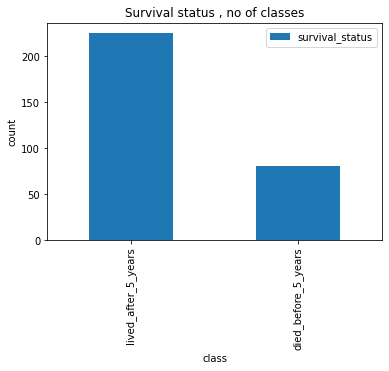

In [9]:
a=data['survival_status'].value_counts().plot.bar()
plt.title('Survival status , no of classes')
plt.legend()
plt.xlabel('class')
plt.ylabel('count')

**OBSERVATIONS**



From the above picture , we can say that the dataset is imbalanced

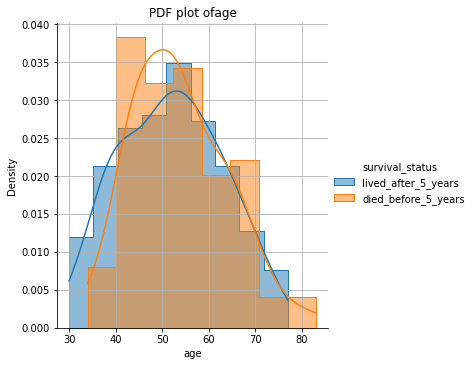

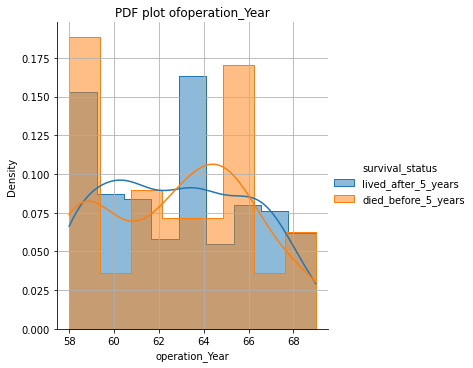

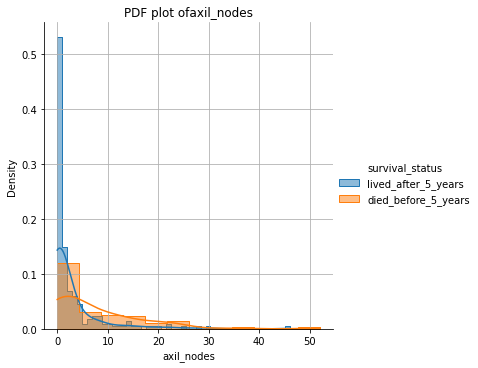

In [10]:
def pdf(data):
  for i in data.columns:
    if i=='survival_status':
      continue
    sns.FacetGrid(data,hue='survival_status',height=5).map(sns.histplot,i,kde=True,element='step',stat='density').add_legend()
    plt.grid()
    plt.title(f'PDF plot of{i}')
pdf(data)

**OBSERVATIONS**

age vs Density plot --- > both pdf are overlaping each other but when age is below 40 then i see majority of the points have survival status of 0 and age greater than 40 i see majority of the points have survival_status of 1 . I only see points of survival_status of 1 if age is greater than 75.

operation_year vs density plot ---> both pdf are overlaping each other 

axil_nodes vs Density plot --> when axil_nodes is 0 we see maximum density of survival status 0 . if axil_nodes are less than 5 i see more majority in survival_status of 0 and if axil_nodes are more than 5 then i see majority of the survival_status of 1



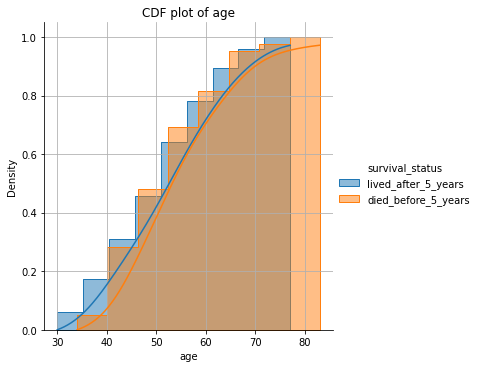

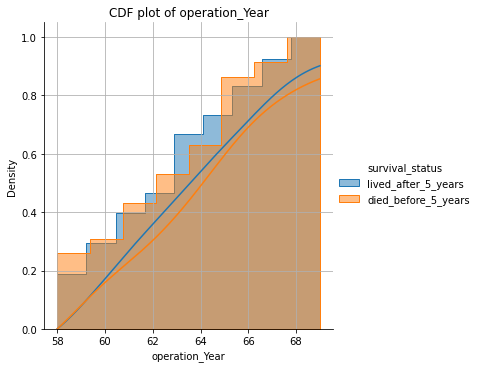

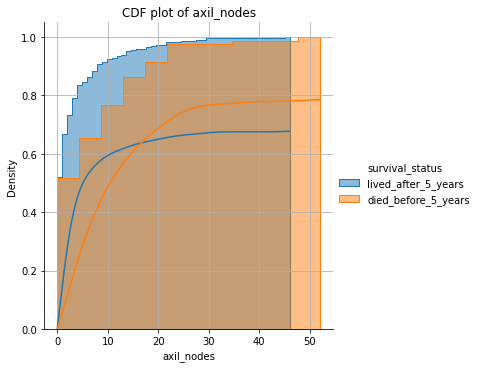

In [11]:
def cdf(data):
  for i in data.columns:
    if i=='survival_status':
      continue
    sns.FacetGrid(data,hue='survival_status',height=5).map(sns.histplot,i,kde=True,element='step',cumulative=True,stat='density').add_legend()
    plt.grid()
    plt.title(f'CDF plot of {i}')
cdf(data)    

**OBSERVATIONS**


age vs Density plot --- > both cdf are overlaping each other but when age is below 40 then i see majority of the points have survival status of 0 and age greater than 40 i see majority of the points have survival_status of 1 . I only see points of survival_status of 1 if age is greater than 75.

operation_year vs density cdf ---> both cdf are overlaping each other 

axil_nodes vs Density cdf --> when axil_nodes is 0 we see maximum density of survival status 0 . if axil_nodes are less than 15 i see more majority in survival_status of 0 and if axil_nodes are more than 15 then i see majority of the survival_status of 1


In [12]:
data

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,lived_after_5_years
1,30,62,3,lived_after_5_years
2,30,65,0,lived_after_5_years
3,31,59,2,lived_after_5_years
4,31,65,4,lived_after_5_years
...,...,...,...,...
301,75,62,1,lived_after_5_years
302,76,67,0,lived_after_5_years
303,77,65,3,lived_after_5_years
304,78,65,1,died_before_5_years


In [13]:

def cdf(live,dead,x):
    counts, bin_edges = np.histogram(live[x], bins=10, 
                                    density = True)
    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,label='live pdf ')
    plt.plot(bin_edges[1:], cdf,label='live cdf')
    plt.legend()
    plt.title(x)
    counts, bin_edges = np.histogram(dead[x], bins=10, 
                                    density = True)
    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,label='dead pdf')
    plt.plot(bin_edges[1:], cdf,label='dead cdf')
    plt.legend()
    plt.xlabel(x)
    plt.title("cdf and pdf of {}".format(x))
    plt.ylabel("probability of RV X<=x for CDF \n probability of RV X=x fpr PDF")
    plt.show();

In [14]:
import numpy as np

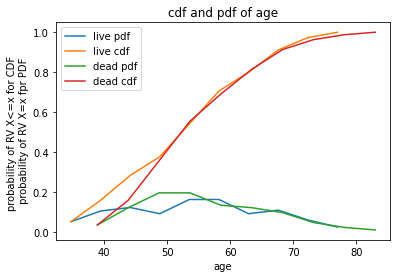

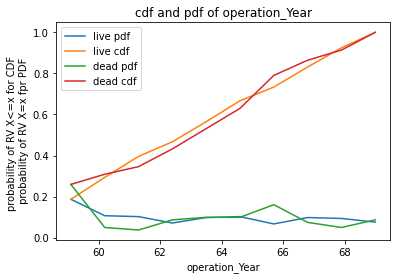

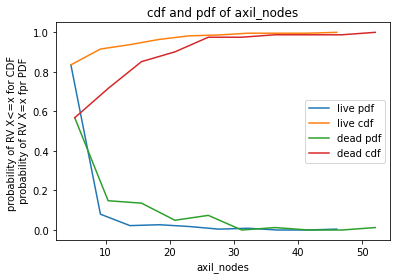

In [15]:
for i in (data.columns):
  if i!='survival_status':
    cdf(data[data['survival_status']=='lived_after_5_years'],data[data['survival_status']=='died_before_5_years'],i)

**Observation**

almost 80% of the survived patients have less than or equal to 5 or positive lymph nodes 

In [16]:
import matplotlib.patches as mpatches

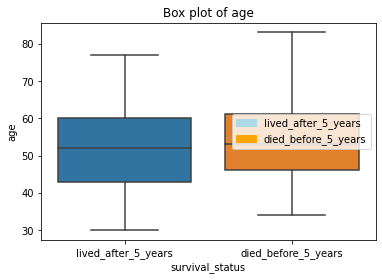

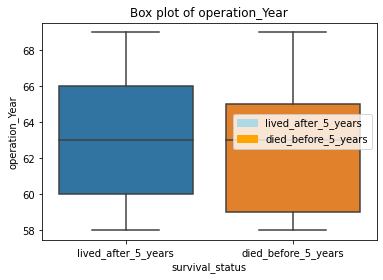

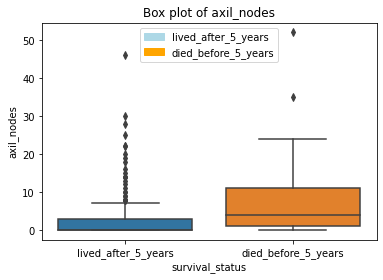

In [17]:
for i in data.columns:
  if i!='survival_status':
    sns.boxplot(x='survival_status',y=i,data=data)
    #plt.show()
    red_patch = mpatches.Patch(color='orange', label='died_before_5_years')
    blue=mpatches.Patch(color='lightblue', label='lived_after_5_years')
    plt.legend(handles=[blue,red_patch])
    plt.title(f"Box plot of {i}")
    plt.show()

**OBSERVATIONS**

age vs Density plot --- > both box plot are overlaping each other but when age is below 40 then i see majority of the points have survival status of 0 and age greater than 40 i see majority of the points have survival_status of 1 . I only see points of survival_status of 1 if age is greater than 75.

operation_year vs density  ---> both boxplot are overlaping each other 

axil_nodes vs Density plot --> when axil_nodes is 0 we see maximum density of survival status 0 . if axil_nodes are less than 5 i see more majority in survival_status of 0 and if axil_nodes are more than 5 then i see majority of the survival_status of 1


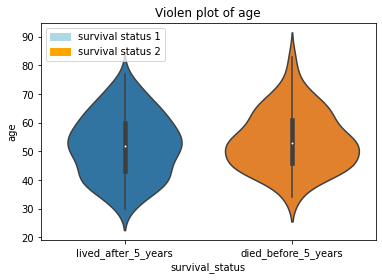

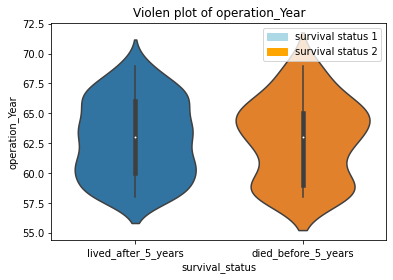

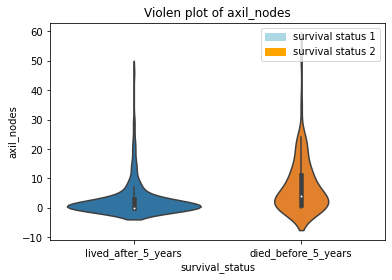

In [18]:
for i in data.columns:
  if i!='survival_status':
    sns.violinplot(x='survival_status',y=i,data=data)
    plt.title(f'Violen plot of {i}')
    red_patch = mpatches.Patch(color='orange', label='survival status 2')
    blue=mpatches.Patch(color='lightblue', label='survival status 1')
    plt.legend(handles=[blue,red_patch])
    plt.show()


**OBSERVATIONS**


age vs Density plot --- > both cdf are overlaping each other but when age is below 40 then i see majority of the points have survival status of 0 and age greater than 40 i see majority of the points have survival_status of 1 . I only see points of survival_status of 1 if age is greater than 75.

operation_year vs density  ---> both boxplot are overlaping each other 

axil_nodes vs Density plot --> when axil_nodes is 0 we see maximum density of survival status 0 . if axil_nodes are less than 5 i see more majority in survival_status of 0 and if axil_nodes are more than 5 then i see majority of the survival_status of 1


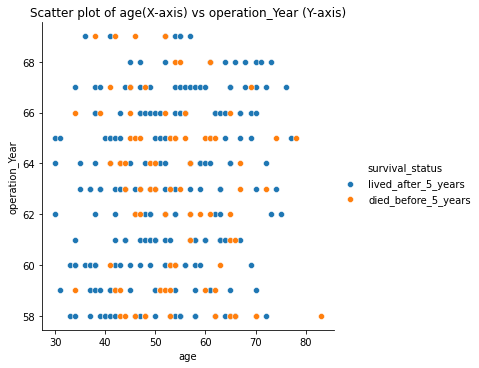

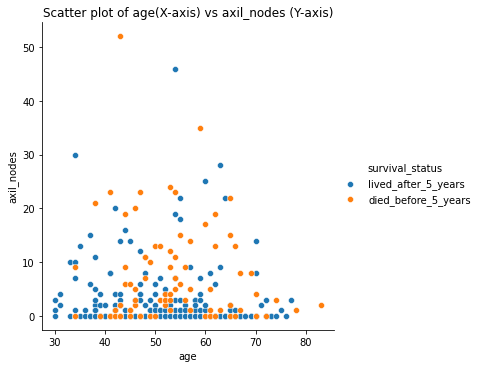

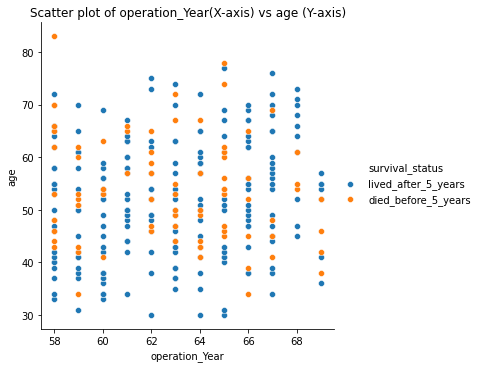

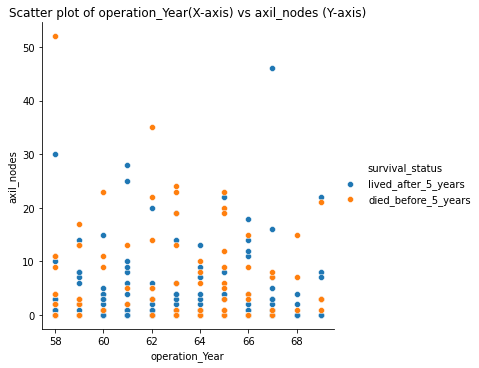

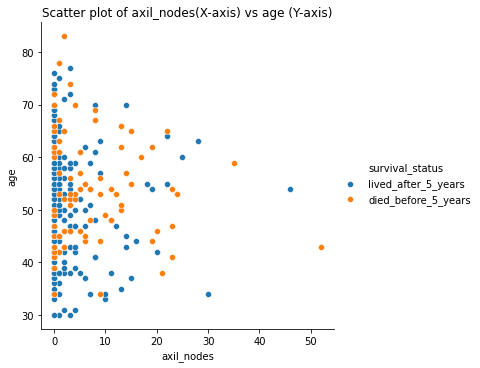

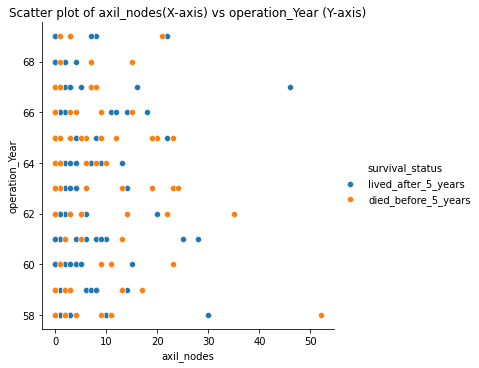

In [19]:
for i in data.columns:
  for j in data.columns:
    if i!='survival_status' and j!='survival_status' and not i==j:
      sns.FacetGrid(data,hue='survival_status',size=5).map(sns.scatterplot,i,j).add_legend()
      plt.title(f'Scatter plot of {i}(X-axis) vs {j} (Y-axis)')

**OBSERVATIONS**


at axil nodes i see if axil_nodes are less than 5 i see more majority in survival_status of 0.

i didn't see any usefull information by seeing other scatter plots for any two given features.

'Scatter plot of haberman dataset'

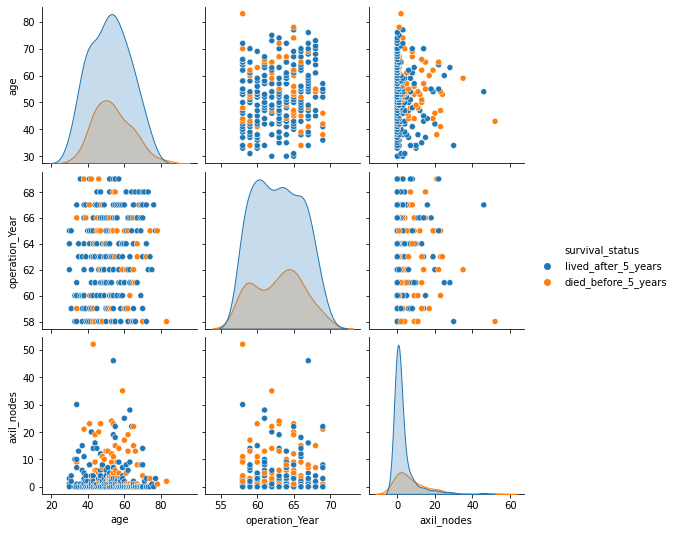

In [20]:
sns.pairplot(data,hue='survival_status')
'Scatter plot of haberman dataset'.center(30,'*')

OBSERVATIONS

age vs Density plot --- > both cdf and pdf are overlaping each other but when age is below 40 then i see majority of the points have survival status of 0 and age greater than 40 i see majority of the points have survival_status of 1 . I only see points of survival_status of 1 if age is greater than 75.

operation_year vs density ---> both boxplot are overlaping each other

axil_nodes vs Density plot --> when axil_nodes is 0 we see maximum density of survival status 0 . if axil_nodes are less than 5 i see more majority in survival_status of 0 and if axil_nodes are more than 5 then i see majority of the survival_status of 1

**SUMMARY**

The more important feature that i observe is axil_nodes and age . 

age feature --> when age is below 40 then i see majority of the points have survival status of 0 and age greater than 40 i see majority of the points have survival_status of 1 . I only see points of survival_status of 1 if age is greater than 75.
**bold text**
axil_nodes feature --> when axil_nodes is 0 we see maximum density of survival status 0 . if axil_nodes are less than 5 i see more majority in survival_status of 0 and if axil_nodes are more than 5 then i see majority of the survival_status of 1
